In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib


df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

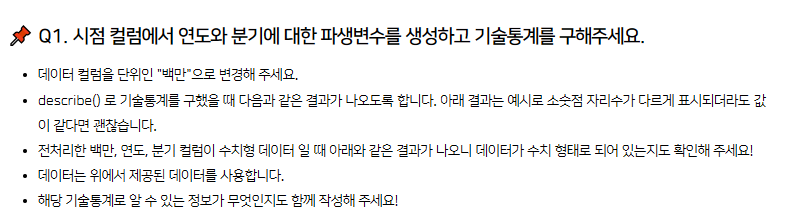

In [2]:
# 컬럼명 변경

df = df.rename(columns = {'데이터' : '백만'})
df

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


In [3]:
# 연도와 분기 파생변수 생성

df["연도"] = df["시점"].map(lambda x : int(x.split(".")[0]))
df["분기"] = df["시점"].map(lambda x : int(x.split(".")[1].split("/")[0]))

In [4]:
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


#### 위의 기술통계로 알 수 있는 정보

- 총 2772건의 데이터가 있다.
- 판매액이 음수인 데이터가 있다.(이상치?)
- 판매액의 중앙값보다 평균이 5배 이상 크고, 표준편차가 큰 것으로 보아 데이터간의 편차가 매우 크다는 것을 알 수 있다.

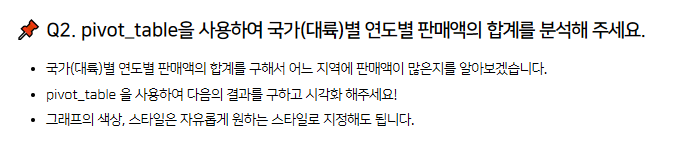

In [5]:
# pivot_table로 판매액 합계 구하기

sales_sum = df.pivot_table(index="국가(대륙)별", columns="연도", values="백만", aggfunc="sum").copy()

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

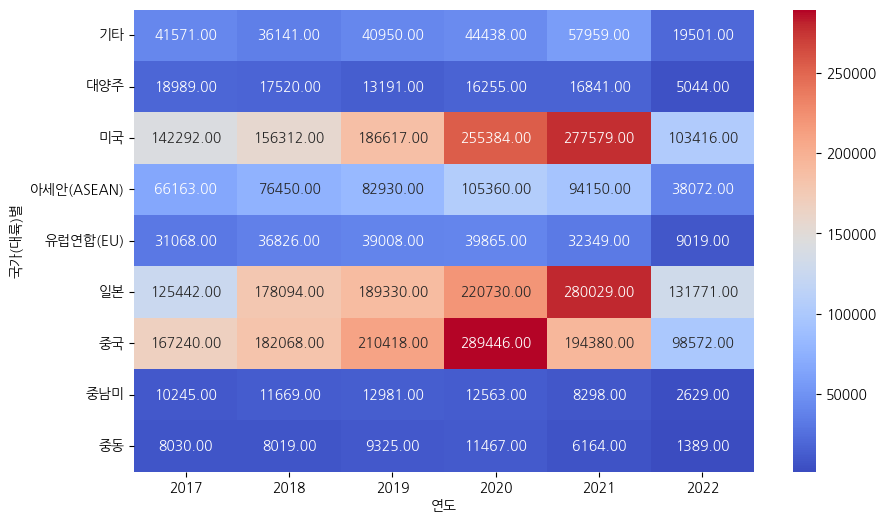

In [6]:
# 이를 시각화하기

plt.figure(figsize=(10,6))
sns.heatmap(sales_sum, 
            annot=True, 
            fmt='.2f', 
            cmap="coolwarm")

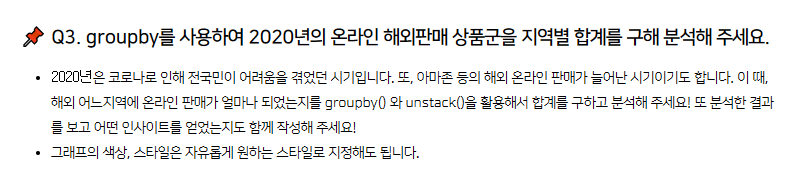

In [7]:
# 2020년 온라인 판매 데이터 따로 데이터프레임에 담아주기

df_2020 = df[df["연도"] == 2020].copy()

In [8]:
# 해당년도 해외지역의 상품군별 판매량 합계 구하기 

df_2020_sum = (df_2020.groupby(["국가(대륙)별","상품군별"])["백만"].sum()).unstack().copy()

<AxesSubplot:xlabel='상품군별', ylabel='국가(대륙)별'>

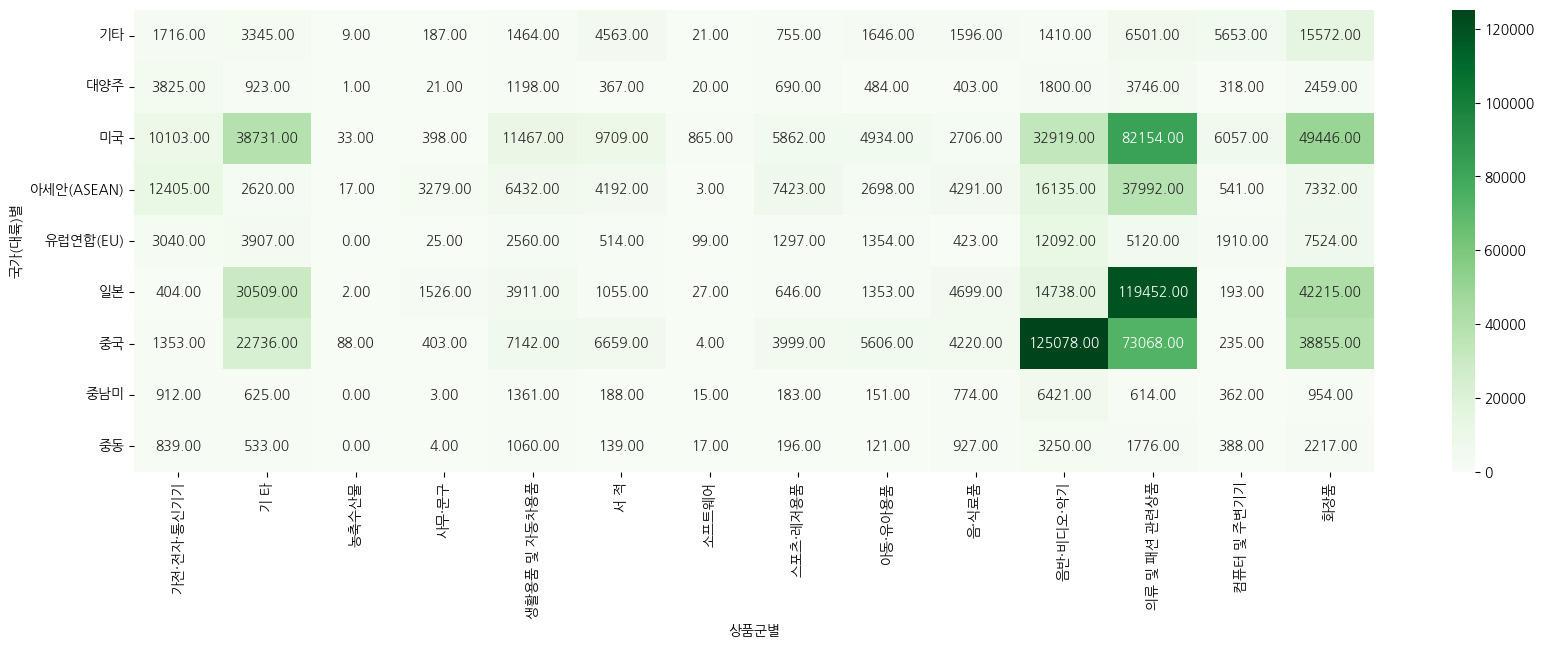

In [9]:
# 이를 시각화하기

plt.figure(figsize=(20,6))
sns.heatmap(df_2020_sum, 
            annot=True, 
            fmt='.2f', 
            cmap="Greens")

#### 위의 분석결과를 통해 얻은 인사이트

- 강세를 띠는 품목 중 "음반,비디오,악기" 에서 K-POP의 흥행을 확인할 수 있다.
- "농축수산물"과 "소프트웨어"의 판매량이 저조하다.
- 판매량이 많은 "음반,비디오,악기", "의류 및 패션 관련상품", "화장품"과 같은 품목들은 미디어의 영향이 큰 것으로 추측된다.

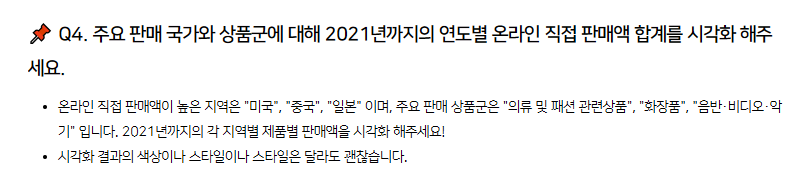

In [11]:
# 주요 판매국과 상품군에 대한 합계 데이터프레임에 각각 담아주기

df_us = df[(df["국가(대륙)별"] == "미국") & 
           (df["상품군별"].str.contains("의류 및 패션 관련상품|화장품|음반·비디오·악기")) &
           (df["연도"] < 2022)].copy()
df_cn = df[(df["국가(대륙)별"] == "중국") & 
           (df["상품군별"].str.contains("의류 및 패션 관련상품|화장품|음반·비디오·악기")) &
           (df["연도"] < 2022)].copy()
df_jp = df[(df["국가(대륙)별"] == "일본") & 
           (df["상품군별"].str.contains("의류 및 패션 관련상품|화장품|음반·비디오·악기")) &
           (df["연도"] < 2022)].copy()

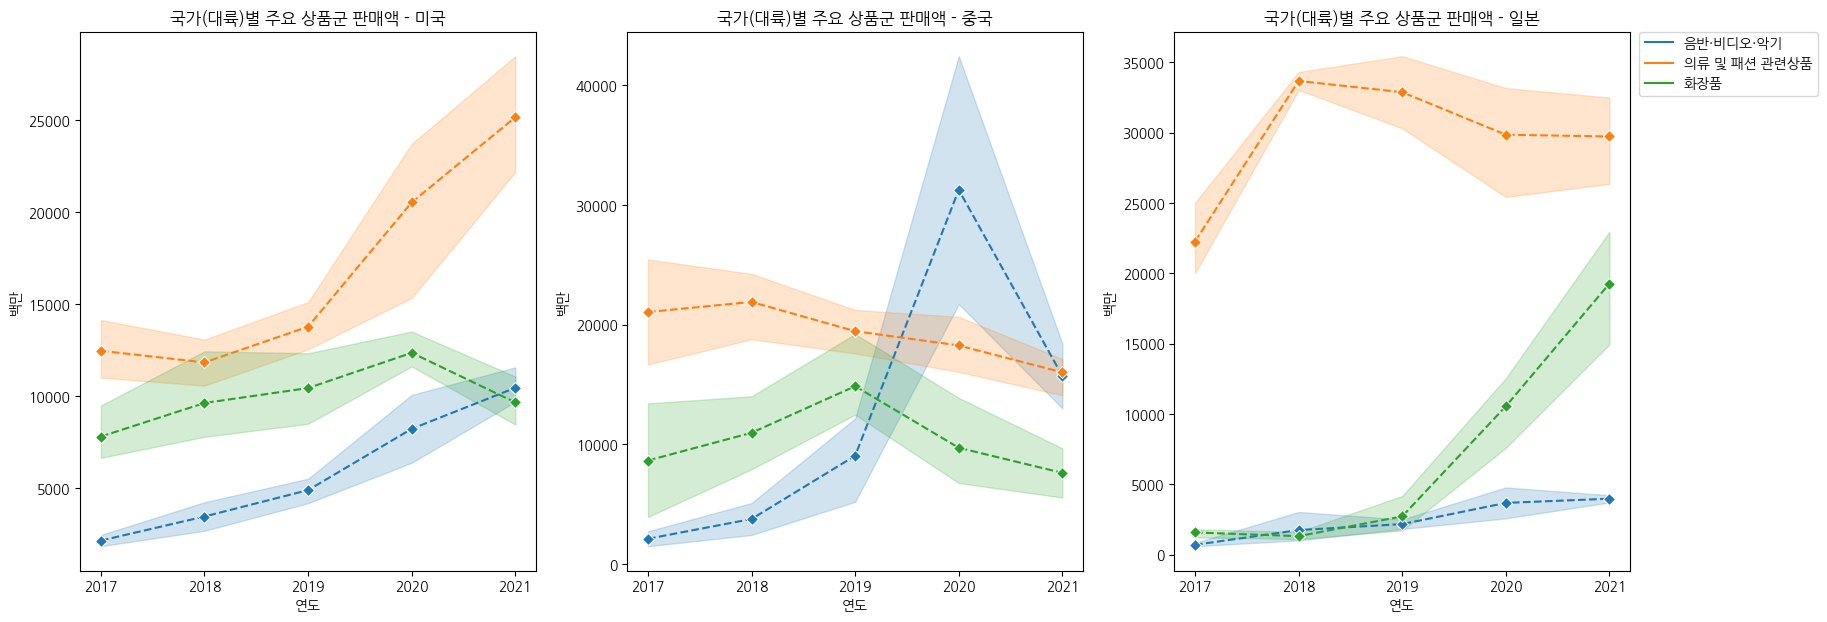

In [27]:
# 서브플롯 생성

fig, axes = plt.subplots(1,3, figsize=(20,7))
fig.subplots_adjust(hspace=1)


# 미국 판매액 그래프
sns.lineplot(data=df_us, x="연도", y="백만", hue="상품군별", ax=axes[0],
             linestyle='--', color='Green', marker='D')
axes[0].set_xticks([2017,2018,2019,2020,2021])
axes[0].set_title('국가(대륙)별 주요 상품군 판매액 - 미국')
axes[0].get_legend().remove()


# 중국 판매액 그래프
sns.lineplot(data=df_cn, x="연도", y="백만", hue="상품군별", ax=axes[1],
             linestyle='--', color='Green', marker='D')
axes[1].set_xticks([2017,2018,2019,2020,2021])
axes[1].set_title('국가(대륙)별 주요 상품군 판매액 - 중국')
axes[1].get_legend().remove()

# 일본 판매액 그래프
sns.lineplot(data=df_jp, x="연도", y="백만", hue="상품군별", ax=axes[2], 
             linestyle='--', color='Green', marker='D')
axes[2].set_xticks([2017,2018,2019,2020,2021])
axes[2].set_title('국가(대륙)별 주요 상품군 판매액 - 일본')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)


plt.show()

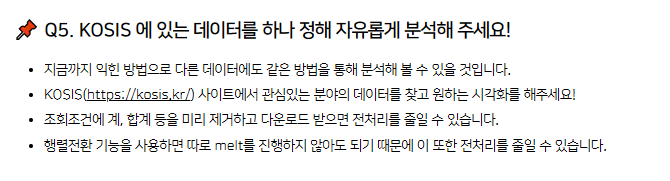

In [19]:
import pandas as pd

# 데이터프레임 컬럼 추출
columns = df.columns[1:]  # 첫 번째 컬럼은 제외

# 연도와 분기 추출
years = [col.split('.')[0] if '.' in col else col for col in columns]
quarters = [col.split('.')[1] if '.' in col else '' for col in columns]

# 데이터프레임 생성
year_and_quarter_df = pd.DataFrame({'연도': years, '분기': quarters})

# 데이터 확인
print(year_and_quarter_df)


     연도 분기
0  2023   
1  2023  1
2  2023  2
3  2023  3
4  2023  4
5  2023  5
6  2023  6
7  2023  7
8  2023  8
9  2023  9


In [25]:
# '연도'와 '월' 파생변수 생성
df_long = df.melt(id_vars=['과목 및 유형'], var_name='시점', value_name='사교육비')
df['연도'] = df_long['시점'].apply(lambda x: x.split('.')[0])
df['월'] = df_long['시점'].apply(lambda x: x.split('.')[1] if '.' in x else '전체')

desc_stats = df.describe()
print(desc_stats)

               2023        2023.1        2023.2        2023.3        2023.4  \
count  2.900000e+01  2.900000e+01  2.900000e+01  2.900000e+01  2.900000e+01   
mean   1.091379e-11  3.541379e-12  2.458621e-12  3.806897e-12  5.234483e-12   
std    2.054409e-11  4.785284e-12  3.273543e-12  5.191059e-12  7.168546e-12   
min    1.000000e-13  1.000000e-13  1.000000e-13  1.000000e-13  1.000000e-13   
25%    9.000000e-13  4.000000e-13  4.000000e-13  4.000000e-13  6.000000e-13   
50%    2.200000e-12  1.000000e-12  8.000000e-13  1.100000e-12  1.400000e-12   
75%    1.050000e-11  5.000000e-12  3.700000e-12  5.700000e-12  7.900000e-12   
max    1.000000e-10  1.830000e-11  1.360000e-11  2.060000e-11  2.790000e-11   

             2023.5        2023.6        2023.7        2023.8        2023.9  
count  2.900000e+01  2.900000e+01  2.900000e+01  2.900000e+01  2.900000e+01  
mean   6.624138e-12  7.662069e-12  8.762069e-12  9.406897e-12  1.228276e-11  
std    9.276455e-12  1.088877e-11  1.271600e-11  1.385